<a href="https://colab.research.google.com/github/sda96/AIFFEL_3rd_hackerton_TUNiB_DKTC/blob/main/notebook/ChangHyun/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 환경 설정

#### 사전에 다운 받은 패키지 불러오기

In [6]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
#os.symlink('/content/drive/MyDrive/TUNiB준비반/AIFFEL_3rd_hackerton_TUNiB_DKTC/reference/my_env', my_path)
sys.path.insert(0, my_path)
os.chdir('/content/drive/MyDrive/TUNiB준비반/AIFFEL_3rd_hackerton_TUNiB_DKTC/notebook/ChangHyun/prototype_model')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### matplotlib 한글 깨짐 해결 코드

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (2,952 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and d

해당 [사이트](https://teddylee777.github.io/colab/colab-korean)를 참고하여 위의 코드를 실행한 다음 런타임 재시작을 해주어야 합니다.

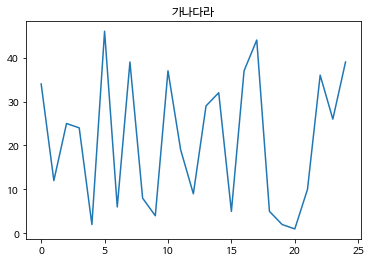

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 한글 지원 폰트
plt.rc('font', family='NanumBarunGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

plt.plot(np.random.randint(1, 50, 25))
plt.title("가나다라")
plt.show()

## 데이터 불러오기

In [ ]:
!pip install transformers

In [7]:
import pandas as pd

under_train = pd.read_csv("./data/sample_data.csv")
under_train.groupby("class").count().iloc[:,0]

class
0    896
1    896
2    896
3    896
4    896
Name: Unnamed: 0, dtype: int64

#### 훈련셋 검증셋 나누기

In [9]:
from sklearn.model_selection import train_test_split
from collections import defaultdict, Counter

X = under_train["pre_conversation"].to_list()
Y = under_train["class"].to_list()

x_train, x_val_test, y_train, y_val_test = train_test_split(X, Y, 
                                                            test_size = 0.1, 
                                                            random_state = 200,
                                                            stratify = Y)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test,
                                                test_size = 0.5,
                                                random_state = 202,
                                                stratify = y_val_test)
print(f"x_train 개수 : {len(x_train)}")
print(f"y_train 개수 : {len(y_train)}")
print(f"x_val 개수 : {len(x_val)}")
print(f"y_val 개수 : {len(y_val)}")
print(f"x_test 개수 : {len(x_test)}")
print(f"y_test 개수 : {len(y_test)}")

print(f"훈련 데이터 레이블 비율 확인 : {Counter(y_train)}")
print(f"검증 데이터 레이블 비율 확인 : {Counter(y_val)}")
print(f"테스트 데이터 레이블 비율 확인 : {Counter(y_test)}")

x_train 개수 : 4032
y_train 개수 : 4032
x_val 개수 : 224
y_val 개수 : 224
x_test 개수 : 224
y_test 개수 : 224
훈련 데이터 레이블 비율 확인 : Counter({3: 807, 4: 807, 1: 806, 0: 806, 2: 806})
검증 데이터 레이블 비율 확인 : Counter({0: 45, 2: 45, 3: 45, 1: 45, 4: 44})
테스트 데이터 레이블 비율 확인 : Counter({2: 45, 1: 45, 4: 45, 0: 45, 3: 44})


## HuggingFace 적용하기

#### Tokenizing

In [10]:
from transformers import ElectraTokenizer, TFElectraForSequenceClassification

HUGGINGFACE_MODEL_PATH = "monologg/koelectra-base-v3-discriminator"
# Load Tokenizer
tokenizer = ElectraTokenizer.from_pretrained(HUGGINGFACE_MODEL_PATH)

Downloading:   0%|          | 0.00/257k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/467 [00:00<?, ?B/s]

In [11]:
# Tokenizing
train_encodings = tokenizer(x_train, truncation=True, padding=True)
val_encodings = tokenizer(x_val, truncation=True, padding=True)

for key in train_encodings:
  print(f"{key} : {train_encodings[key][0]}")

input_ids : [2, 6409, 9559, 10120, 4239, 3170, 4520, 3178, 6239, 4114, 4761, 7226, 6983, 4006, 4112, 6645, 3093, 4006, 4283, 4064, 4086, 10023, 3167, 4292, 2884, 7787, 4219, 3755, 23602, 7082, 4737, 4397, 3288, 4070, 7008, 3167, 4292, 3247, 4373, 7008, 8245, 4007, 4073, 4150, 6409, 4006, 4112, 6409, 4542, 4325, 26489, 4200, 2126, 14119, 4112, 6451, 4258, 4239, 2252, 2041, 4176, 3013, 7933, 10367, 4207, 4188, 4239, 9385, 2734, 4112, 3167, 4007, 4271, 2633, 4007, 4073, 4150, 3243, 4292, 8452, 4279, 4325, 7227, 4116, 23938, 2184, 7692, 4219, 3018, 4025, 27727, 9911, 4172, 3288, 4070, 6595, 11058, 4034, 3167, 4139, 4244, 6294, 4172, 2789, 4076, 4114, 4181, 3081, 4587, 10397, 3311, 4153, 7258, 24607, 3041, 4176, 2126, 3167, 6761, 2630, 4005, 20314, 4520, 6930, 4283, 4064, 8314, 4519, 11843, 7791, 4172, 4150, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Tensorflow dataset으로 변환

In [12]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), 
                                                    y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), 
                                                  y_val))
train_dataset

<TensorSliceDataset shapes: ({input_ids: (433,), token_type_ids: (433,), attention_mask: (433,)}, ()), types: ({input_ids: tf.int32, token_type_ids: tf.int32, attention_mask: tf.int32}, tf.int32)>

#### Fine-tuning KoELECTRA

In [13]:
num_labels = max(under_train["class"]) + 1
model = TFElectraForSequenceClassification.from_pretrained(HUGGINGFACE_MODEL_PATH, 
                                                           num_labels=num_labels, 
                                                           from_pt=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, 
              loss=model.compute_loss, 
              metrics=['accuracy'])
model.summary()

Downloading:   0%|          | 0.00/431M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'electra.embeddings.position_ids', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing TFElectraForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFElectraForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFElectraForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dens

Model: "tf_electra_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 electra (TFElectraMainLayer  multiple                 112330752 
 )                                                               
                                                                 
 classifier (TFElectraClassi  multiple                 594437    
 ficationHead)                                                   
                                                                 
Total params: 112,925,189
Trainable params: 112,925,189
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001, # the threshold that triggers the termination (acc should at least improve 0.001)
    patience=2)

model.fit(
    train_dataset.shuffle(1000).batch(16), epochs=1, batch_size=16,
    validation_data=val_dataset.shuffle(1000).batch(16),
    callbacks = [callback_earlystop]
)

252/252 [==============================] - 257s 912ms/step - loss: 0.7080 - accuracy: 0.7510 - val_loss: 0.3053 - val_accuracy: 0.9018


#### 모델 저장하기

In [15]:
model_path = "./model/fine-tuned-koelectra-base-v3"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('./model/fine-tuned-koelectra-base-v3/tokenizer_config.json',
 './model/fine-tuned-koelectra-base-v3/special_tokens_map.json',
 './model/fine-tuned-koelectra-base-v3/vocab.txt',
 './model/fine-tuned-koelectra-base-v3/added_tokens.json')

## HuggingFace 모델 평가하기

In [17]:
from transformers import TextClassificationPipeline

# Load Fine-tuning model
loaded_tokenizer = ElectraTokenizer.from_pretrained(model_path)
loaded_model = TFElectraForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=tokenizer, 
    model=model, 
    framework='tf',
    return_all_scores=True
)

All model checkpoint layers were used when initializing TFElectraForSequenceClassification.

All the layers of TFElectraForSequenceClassification were initialized from the model checkpoint at ./model/fine-tuned-koelectra-base-v3.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFElectraForSequenceClassification for predictions without further training.


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

predicted_label_list = []
predicted_score_list = []

for text in tqdm(x_test):
    # predict
    preds_list = text_classifier(text)[0]

    sorted_preds_list = max(preds_list, key=lambda x: x['score'])
    predicted_label_list.append(sorted_preds_list["label"]) # label
    predicted_score_list.append(sorted_preds_list["score"]) # score

100%|██████████| 224/224 [02:14<00:00,  1.66it/s]


In [21]:
y_pred = [int(label[-1]) for label in predicted_label_list]
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           1       0.82      0.93      0.87        45
           2       1.00      0.89      0.94        45
           3       0.92      0.75      0.83        44
           4       1.00      1.00      1.00        45

    accuracy                           0.91       224
   macro avg       0.92      0.91      0.91       224
weighted avg       0.92      0.91      0.91       224



## 사후 평가

In [22]:
false_list = []
for i in range(len(y_true)):
  if y_true[i] != y_pred[i]:
    false_list.append(i)

In [23]:
test_dataset = pd.DataFrame({"x" : x_test, "y_true" : y_test, "y_pred" : y_pred})
test_dataset.iloc[false_list, :]

,x,y_true,y_pred
5,조용히 이혼하고 이 집만 넘겨 당신이 무슨 자격으로 무슨 자격이라니 잊었나본데 당신...,1,0
22,야 뭐하냐 어 아 이 찐따새끼 또 만화 쳐보고 있네 이딴게 재밌냐 하지마 돌려줘 뭐...,3,0
38,선배 제 뒷담 그만좀 하세요 내가 언제 이제 저도 지칩니다 들었어 어디서 많이 들었...,2,3
53,이자는 이자까지 줬잖아 그건 저번 기간 이자고 이번 기간 이자까지 줘야지 이 년아 ...,3,0
56,어우 김선생 좀봐 머리를 하고왔는데도 얼굴이 저 꼬라지네 못봐주겠다 진짜 저 인간은...,2,3
58,야 니 롤 티어 첼린저더라 응 맞아 나 요즘 롤 즐겨하는데 티어가 안오르던데 너 좀...,0,1
63,선생님 저 이번 시험 점수 도저히 납득이 되질 않습니다 은혜야 갑자기 그게 무슨 말...,1,0
83,아니 피뽑는게 왜이렇게아파 환자분 원래조끔 따금해요 바늘이 들어가는데 안아플수가없잖...,3,0
89,미연씨 혹시 오늘 저녁에 뭐 먹어요 저 오늘 아직 저녁 생각은 안해봤어요 아 혹시 ...,2,1
115,야 체육복 있냐 응 응응 있지 왜 나 교시에 체육시간인데 체육복 없어서 빌려주라 아...,3,1


#### Confusion Matrix

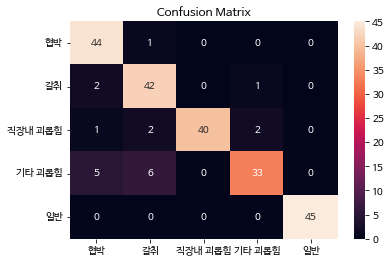

In [24]:
conf_matrix = confusion_matrix(y_true, y_pred)
names = ["협박", "갈취", "직장내 괴롭힘", "기타 괴롭힘", "일반"]
conf_matrix = pd.DataFrame(conf_matrix, index = names, columns = names)
sns.heatmap(conf_matrix, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.show()

In [25]:
conf_matrix.style.background_gradient(cmap = "summer")

,협박,갈취,직장내 괴롭힘,기타 괴롭힘,일반
협박,44,1,0,0,0
갈취,2,42,0,1,0
직장내 괴롭힘,1,2,40,2,0
기타 괴롭힘,5,6,0,33,0
일반,0,0,0,0,45
